In [3]:
#import mss
from mss import visreader as mvis
from mss import mssmain as msm
from mss import align
from mss import frag
from mss import dm
import pandas as pd

# Peak extraction
## Single file
Alignment of different smaples could be conducted with align.mss_align function

In [2]:
#Import mzml file
path = '../example_data/ex_1.mzML'
scans = msm.get_scans(path, ms_all=True)
#noise removal
msm.noise_removal(scans, 5000)
#Generate peak list
msm.peak_list(scans[:500], 10, enable_score=True,peak_base=0.001,peak_area_thres=0)

Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!


m/z    rt      sn  score     peak area
0     100.1127  2.47  10.450      3  1.691418e+05
1     104.1078  0.68   0.000      3  2.637985e+04
2     104.9923  0.64   0.000      1  8.390570e+06
3     104.9933  0.64  69.370      1  8.168138e+06
4     105.9955  0.63   0.000      3  1.388078e+05
..         ...   ...     ...    ...           ...
264   923.0153  1.38  13.176      3  2.618347e+06
265   923.0153  1.86  15.289      3  2.617588e+06
266   925.0204  0.64   0.000      3  3.568724e+04
267   994.9927  0.65   0.000      3  4.122322e+04
268  1001.0106  0.63   0.000      3  5.651240e+04

[269 rows x 5 columns]

* Complete function configurations (access with shift+tab):
~~~
msm.peak_list(
    mzml_scans,
    err_ppm=10,
    enable_score=True,
    mz_c_thres=5,
    peak_base=0.001,
    peakutils_thres=0.1,
    min_d=1,
    rt_window=1.5,
    peak_area_thres=100000.0,
    min_scan=5,
    max_scan=200,
    max_peak=5,
    overlap_tol=15, 
    sn_detect=15, 
    rt=None)
~~~

## mss_process: from mzml to aligned peak list

In [3]:
align.mss_process('../example_data/', '../example_data/example_peaklist/aligned_peak_list.csv', thres_noise=100000,enable_score=False)

Reading files...


100%|██████████| 4/4 [00:10<00:00,  2.70s/it]


['example.mzML', 'ex_1.mzML', 'ex_2.mzML', 'ex_3.mzML']
Batch read finished!
Processing peak list...
Processing 1 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Processing 2 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Processing 3 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Processing 4 out of  4 file
Generating mz list...
Finding peaks...
Peak processing finished!
Dataframe created!
Process completed!
Alignment beginning..


100%|██████████| 868/868 [00:02<00:00, 391.85it/s]


Alignment done!
Result saved to ../example_data/example_peaklist/aligned_peak_list.csv
Finished!


Average m/z  Average rt  Average sn  Average score       example  \
0     102.014198    0.450000       2.054            1.0  379178.34375   
1     104.993263    0.637000    5000.000            1.0       0.00000   
2     113.964996   21.180000    5000.000            1.0  580375.25000   
3     121.050903    0.790000    5000.000            1.0  404855.34375   
4     121.050903    5.950000       2.082            1.0  373235.00000   
..           ...         ...         ...            ...           ...   
207   723.518860   19.207001    5000.000            1.0       0.00000   
208   727.603821   15.550000    5000.000            1.0       0.00000   
209   728.608643   15.553000    5000.000            1.0       0.00000   
210   783.668701   16.483000    5000.000            1.0       0.00000   
211  1342.936768   19.205000    5000.000            1.0       0.00000   

             ex_1          ex_2          ex_3  
0    0.000000e+00  0.000000e+00  0.000000e+00  
1    7.830790e+06  7.705347e+06  7.648624e+06  
2    0.000000e+00  0.000000e+00  0.000000e+00  
3    0.000000e+00  0.000000e+00  0.000000e+00  
4    0.000000e+00  0.000000e+00  0.000000e+00  
..            ...           ...           ...  
207  1.499962e+07  1.490802e+07  1.491226e+07  
208  7.301074e+06  7.171254e+06  4.369608e+06  
209  1.527725e+06  1.429946e+06  1.409153e+06  
210  4.111448e+06  3.975550e+06  4.019351e+06  
211  0.000000e+00  6.168859e+05  7.739580e+05  

[212 rows x 8 columns]

In [4]:
# Batch reading for mzml files
batch_scan, file_list = msm.batch_scans('../example_data/')
# Quick peak screening/integration through different files
d_result = msm.batch_peak(batch_scan, file_list, 283.1816, 50)
d_result

100%|██████████| 4/4 [00:11<00:00,  2.98s/it]


['example.mzML', 'ex_1.mzML', 'ex_2.mzML', 'ex_3.mzML']
Batch read finished!


rt_max  rt_start  rt_end     peak_area        source
0    8.45      8.35    8.77  8.528269e+06  example.mzML
1    8.48      8.38    9.14  1.295261e+08     ex_1.mzML
2    8.48      8.37    9.10  1.284578e+08     ex_2.mzML
3    8.48      8.38    9.06  1.293620e+08     ex_3.mzML

# Data inspection/visualization module

In [6]:
mvis.tic_plot(scans, interactive=True, f_width=10, f_height=6)

In [8]:
mvis.ms_spectrum(scans,time=12.69,interactive=True,f_width=10,f_height=6)

<Figure size 432x288 with 0 Axes>

In [10]:
mvis.ms_chromatogram(
    scans,
    input_value=399.2523, # Chemical formula, m/z value both works
    error=10, # ppm
    fillgap=False,
    mode='pos',
    interactive=True,
    f_width=10,
    f_height=6,
)

#Coupled with integration plot or chromatogram plot
mvis.manual_integration(scans,input_mz=399.2523,error=10,start=12,end=14)

17930282.455729164

Peak retention time: 12.69 minute, Peak area:  17900214.6


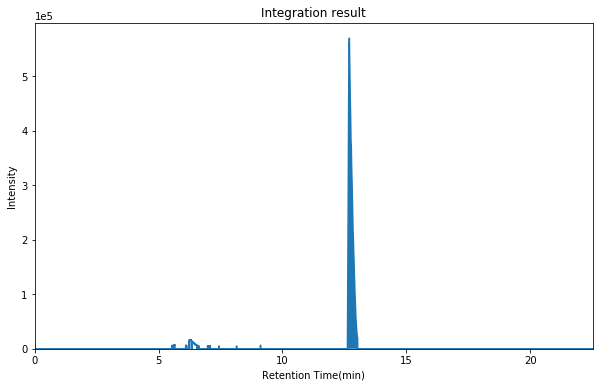

In [11]:
mvis.integration_plot(scans, 399.2523, 10,f_width=10, f_height=6)

In [12]:
import pandas as pd
#Overview of the imported mzml file
mvis.overview_scatter(pd.read_csv('../example_data/example.csv'))

    'data': [{'marker': {'opacity': 0.5},
              'mode': 'markers…

# DM module

## Data clean up

In [14]:
d_ms = pd.read_csv('../example_data/example.csv')
# Data cleaning -- blank removal, RSD check, retains features that meaningful for subsequent analysis
keys=['solvent','MeOH','ISTD'] # User select key strings in the data label from the blank samples
d_sample = dm.data_prep(d_ms,
                        keys,
                        simp_summary=False, #Optional average of replicates/CV calculation
                        svb_thres=10,
                        empty_thres=0,
                        rt_range=[2, 20],
                        mz_range=[200, 800],
                        sn_thres=3,
                        score_thres=0,
                        area_thres=100000)
d_sample.head()

100%|██████████| 7/7 [00:02<00:00,  3.14it/s]


Average m/z  Average rt   Average sn  Average score    15min_1     15min_2  \
0    200.07184       6.269     3.636500              1   54678.79   44141.285   
1    200.07265       5.725     4.134429              1  105930.68  140324.440   
2    200.07127       4.848     9.874761              1   82868.14   94710.190   
4    200.08714       6.929  1267.909200              1  160914.33  221140.950   
6    200.09070      15.155     3.137500              1   68103.08   14056.476   

      15min_3       1h_1        1h_2       1h_3  ...     30min_3       4h_1  \
0  189940.880       0.00       0.000       0.00  ...  213060.250  103286.32   
1   61354.580   83699.19  126018.664  177297.27  ...   66302.630  114740.90   
2   55623.477   96109.65   97315.620  219414.34  ...   68374.000   77777.61   
4  161338.190  241858.56  299966.000  167917.83  ...  265436.400  134293.90   
6   82632.920       0.00       0.000       0.00  ...   48652.836       0.00   

         4h_2        4h_3       6h_1       6h_2       6h_3        T0_1  \
0  165942.900   33359.500       0.00       0.00       0.00   90425.980   
1   51638.850  136146.900  136208.42  189548.08   53266.54  132835.640   
2  113548.734   45313.880   66196.08  165290.81   65243.24   87390.910   
4  244612.170  120147.016  323141.30  399560.30  353856.72       0.000   
6       0.000       0.000       0.00       0.00       0.00   85220.555   

         T0_2       T0_3  
0  116799.050  196114.53  
1   86328.875  462870.53  
2   63871.380  369021.53  
4       0.000       0.00  
6   92658.410  109355.42  

[5 rows x 25 columns]

# Statistical analysis module

In [4]:
d_sample = pd.read_csv('../example_data/example_pca.csv') #DEMO data, pre-treated from dataframe above
d_sample.head()

Average m/z  Average rt  Average sn     Sample-T0  Sample-15min  \
0    100.01391      19.315    2.914222  271567.82000   253389.6700   
1    100.01397      17.723    3.860174  181919.32670   238582.4100   
2    100.01401      18.572    3.625520  397183.29000   109388.2187   
3    100.01402      16.828    3.433640  138308.93670   128661.4357   
4    100.01432      20.100    2.911555   55115.61667   113631.0320   

   Sample-30min    Sample-1h   Sample-2.5h     Sample-4h     Sample-6h  
0   253964.0533  210381.5000   11694.94533   43703.81500   33347.28667  
1   368346.7867  260821.8600  321300.57330  107147.37970  217524.70330  
2   507371.0600  116942.4220  291988.43670   82991.91667   90705.08867  
3   273132.1800  176959.1033   81405.48667  199444.50330  328527.69330  
4   125013.8523  142348.9847  246281.71670  175741.56000  133732.59670

## PCA

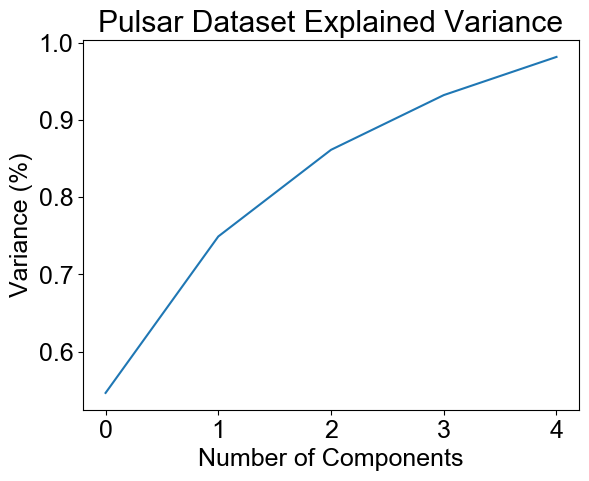

explained ratio: [0.54649902 0.20270214 0.11224721 0.07089315 0.04945662]


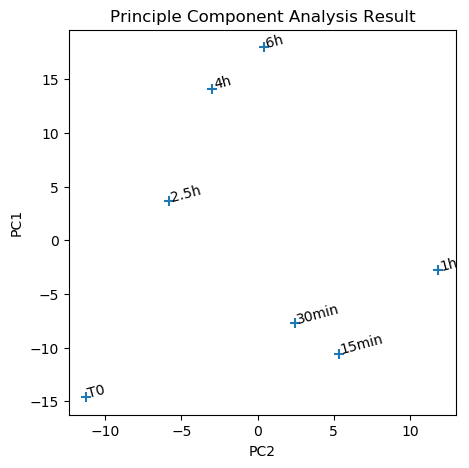

In [25]:
import matplotlib as plt
font = {'family' : 'arial',
        'size'   : 18}

plt.rc('font', **font)
df = dm.PCA_report(pca_t,figsize = (5,5))

In [48]:
df.round(2)

principal component 1  principal component 2  label
0                 -14.62                 -11.24     T0
1                 -10.56                   5.33  15min
2                  -7.73                   2.44  30min
3                  -2.79                  11.86     1h
4                   3.62                  -5.80   2.5h
5                  14.11                  -2.99     4h
6                  17.97                   0.40     6h

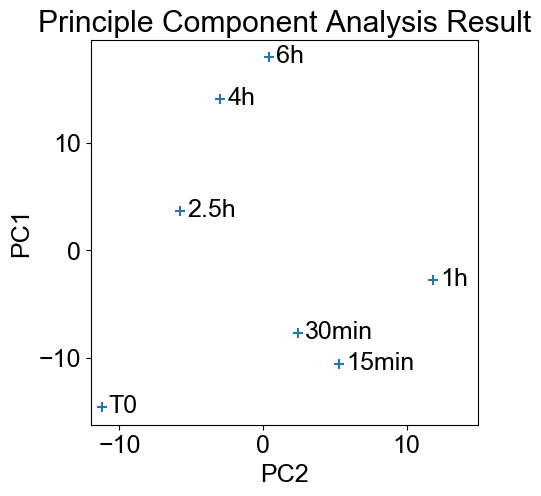

In [47]:
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'arial',
        'size'   : 18}

matplotlib.rc('font', **font)
principle_1 = df.loc[:, 'principal component 1']
principle_2 = df.loc[:, 'principal component 2']
n = list(df.label)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(principle_2, principle_1, s=50, marker='+')
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title('Principle Component Analysis Result')

for i, txt in enumerate(n):
    ax.annotate(txt, (principle_2[i]+0.5, principle_1[i]-0.5), rotation=0)

plt.xlim(-12,15)
plt.show()


## Clustering analysis based on DBSCAN

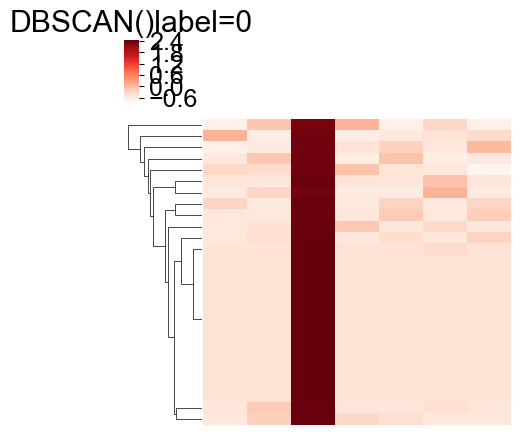

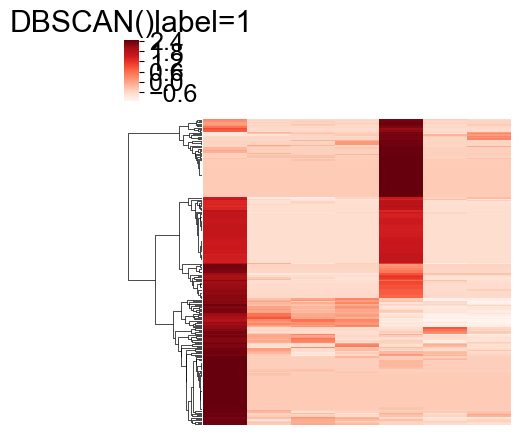

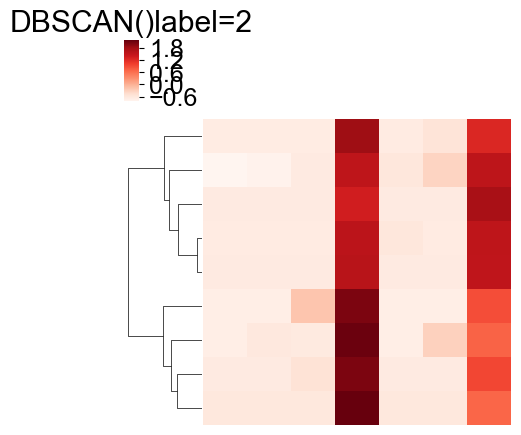

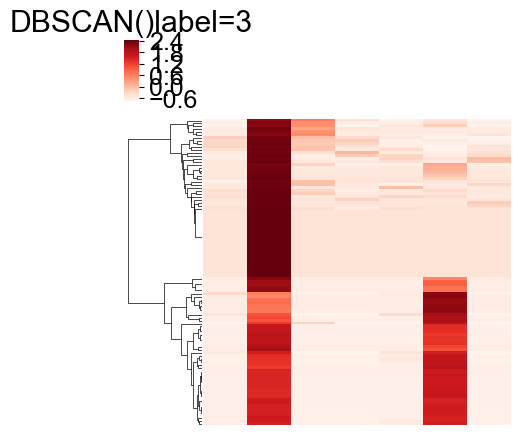

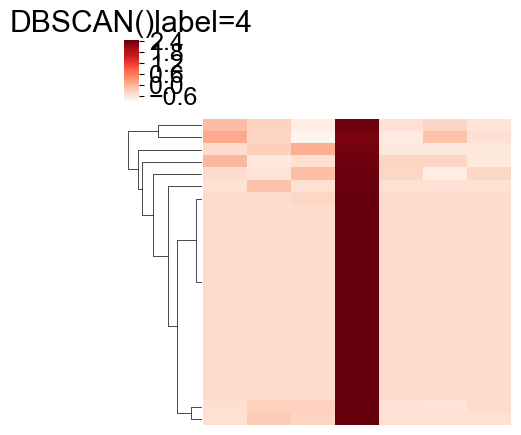

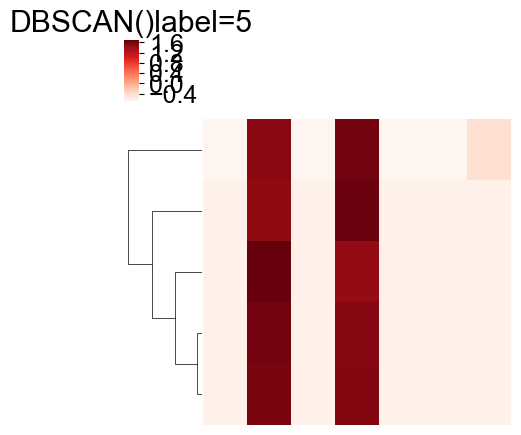

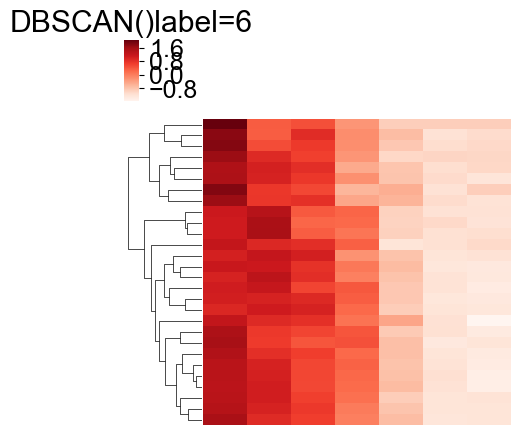

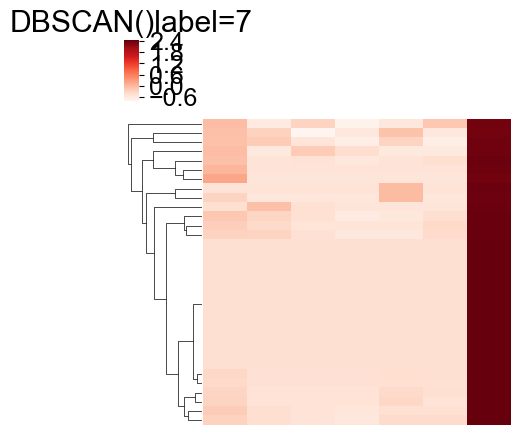

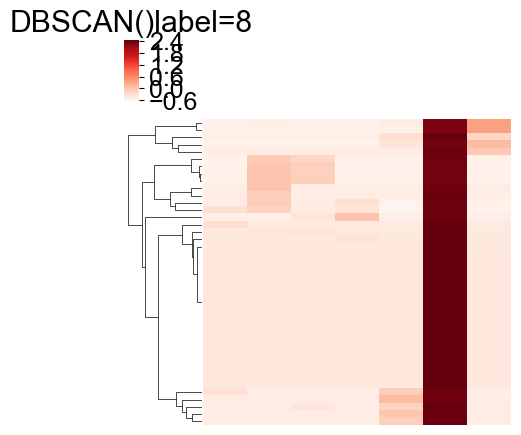

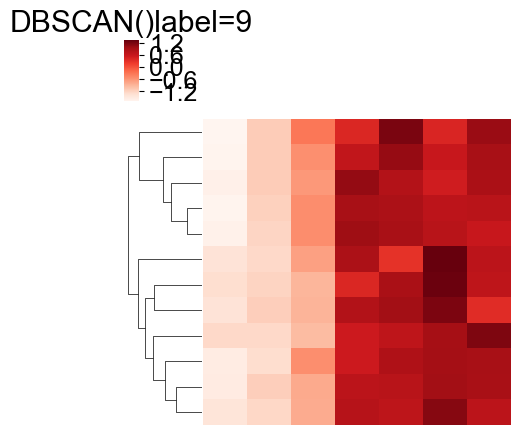

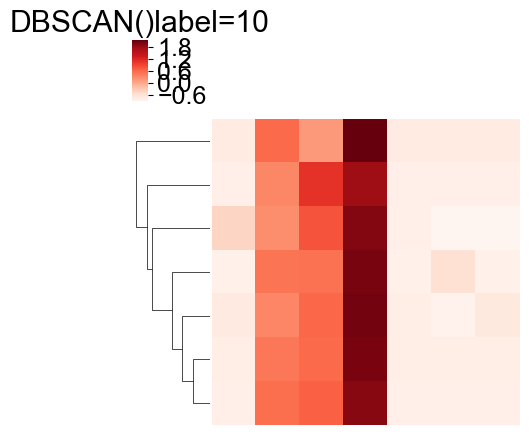

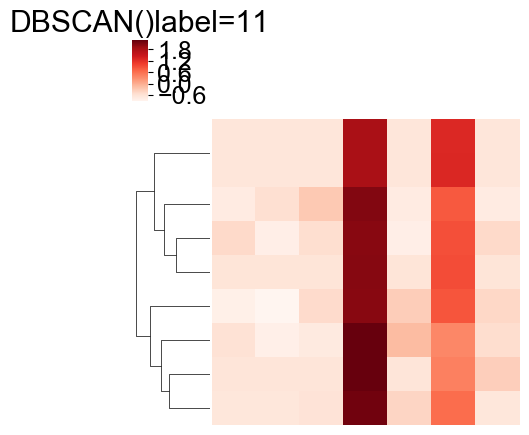

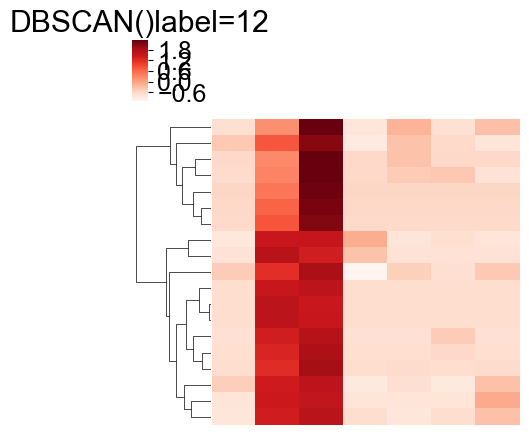

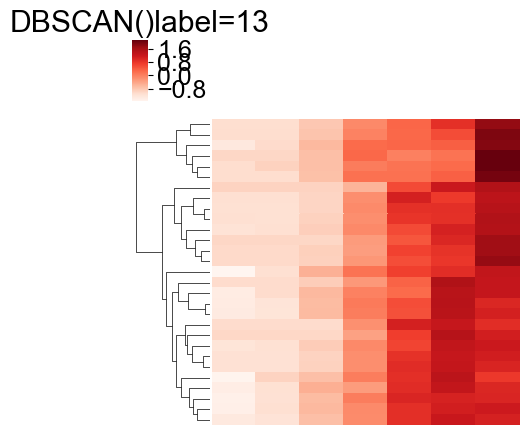

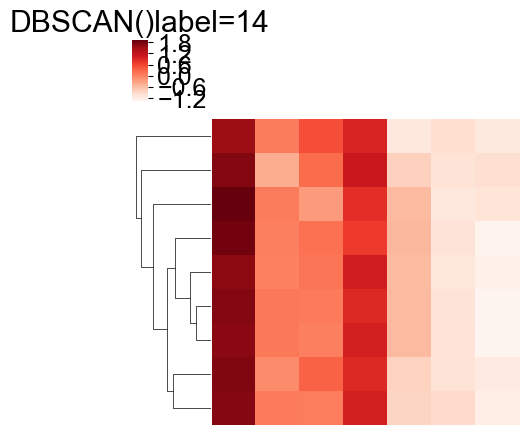

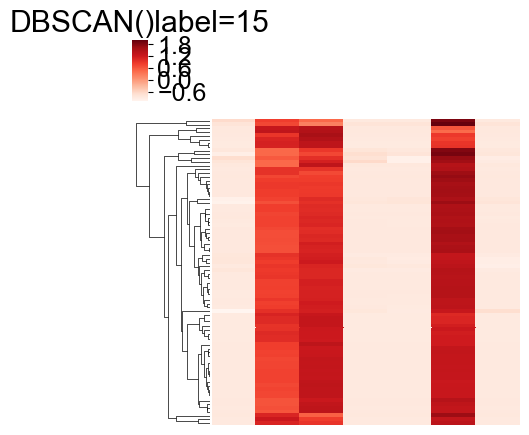

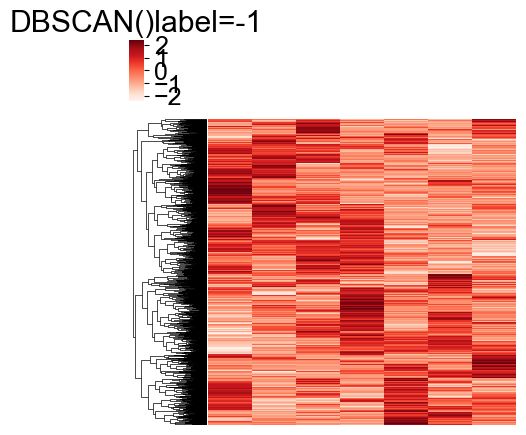

In [49]:
d_label = dm.ms_cluster(d_sample, 
                        select_keyword=['Sample'],
                        normalization='zscore', 
                        visual=True,
                        d_reduce=False,
                        d_reduce_method='tsne',
                        perplexity=20,
                        cluster_method='dbscan', 
                        eps=0.5, 
                        min_samples=5)

In [56]:
d_label.to_csv('D:/UW/Writing/Package/clustered_data.csv')

## Source apportionment/modeling

100%|██████████| 37/37 [00:35<00:00,  1.05it/s]


data split finished!
modeling finished!
Report starting...
BaggingRegressor(base_estimator=SVC(), n_estimators=5, random_state=10)
The model score for cluster 0 is: 0.939
The model score for cluster 1 is: 0.227
The model score for cluster 2 is: -0.464
The model score for cluster 3 is: 0.2
The model score for cluster 4 is: -2.535
The model score for cluster 5 is: -0.997
The model score for cluster 6 is: -0.3
The model score is the coefficient of determination.
Report finished!
model didn't match labels!


18.599999999999998

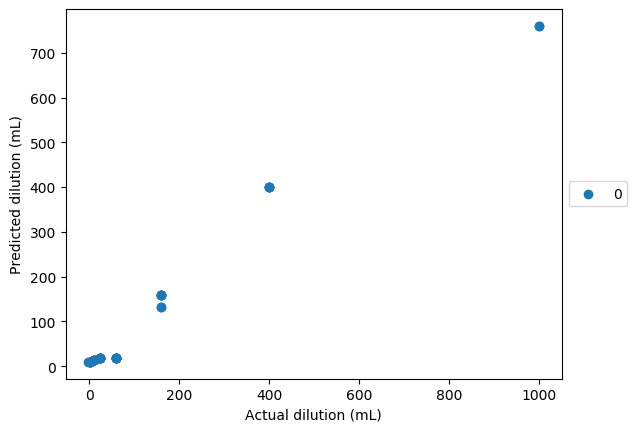

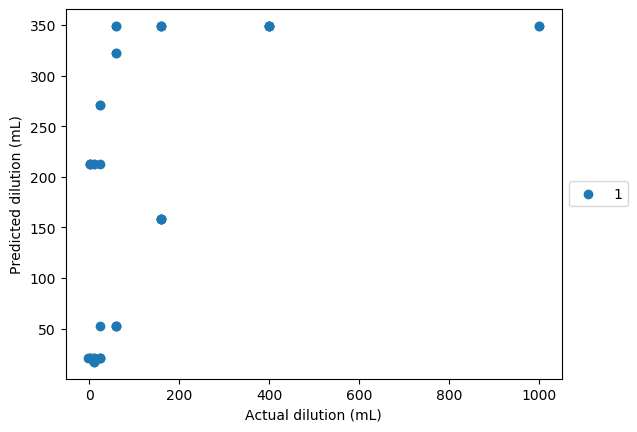

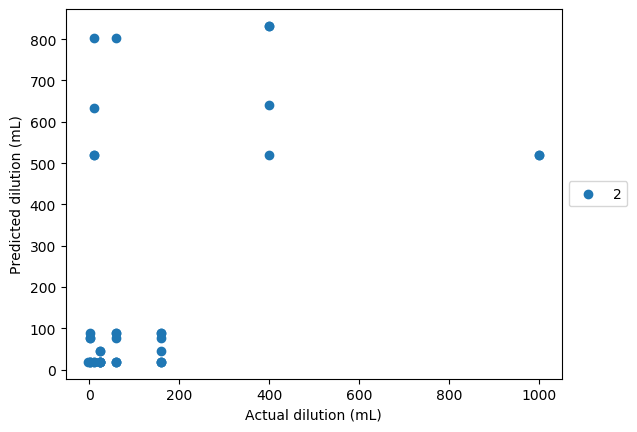

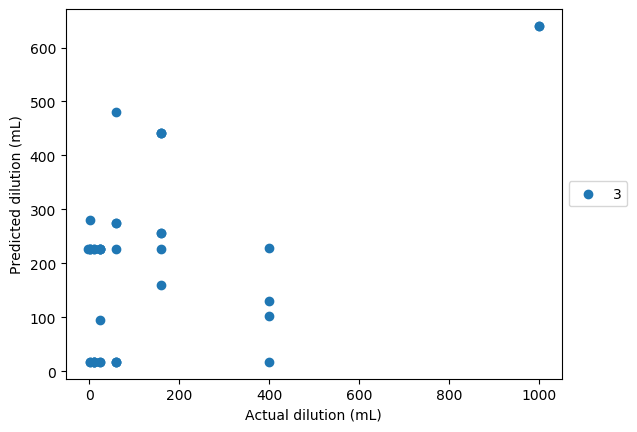

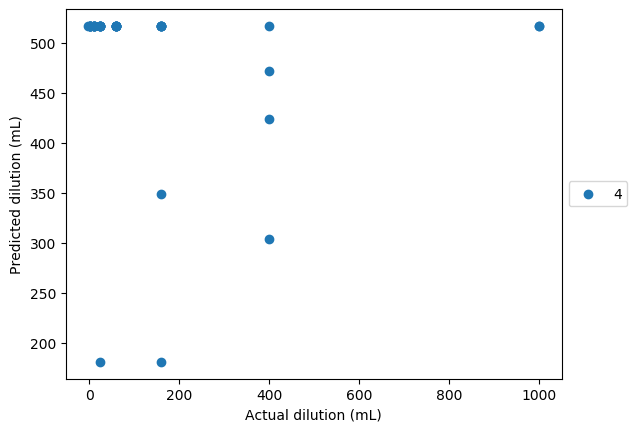

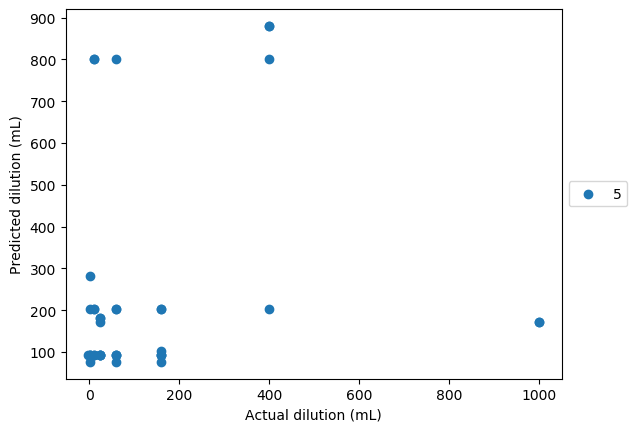

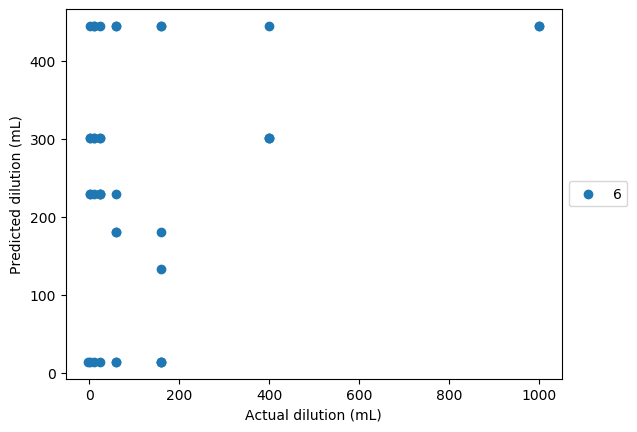

In [19]:
# Data import
d_ms = pd.read_csv('../example_data/clustering/sample1114.csv')
d_test = pd.read_csv('../example_data/clustering/sample0815.csv')

# Data cleaning 
keys=['solvent','MeOH','ISTD']
d_sample = dm.data_prep(d_ms,keys,rt_range = [2,20], mz_range = [200,800], area_thres=100000)

# Clustering analysis
d_label = dm.ms_cluster(d_sample, ['SR520-Cal'], 'linear', d_reduce=False, visual=False, cluster_method='dbscan', eps=0.6, min_samples=10)

# Model training
d_model = d_label[d_label['label']!=-1].copy()
d_merge = dm.batch_alignment(d_model,d_test)
dilu_col=['SR520-Cal','SR520_Cal']
d_transpose = dm.transpose(d_merge, dilu_col)
reg = dm.feature_model(d_transpose, cluster_algorithm=True, model_method='ensemble_bagging_svc', report=True)

# Prediction on selected new samples based on the model generated above
dm.cluster_pred(reg, d_merge, '20181114_CoulterCreek_1', selected_cluster=[0,1,3,5,7,9], model_merge='weighted_size')

## annotation tools

In [20]:
# Formula calculator
msm.mf_calculator(299.1765)

Exact Mass      Formula  Unsat  Mass error (Da)  Mass error (ppm)
0   299.176456   C3H19N14O3    1.5        -0.000044           -0.1486
1   299.176264  C14H26N3O2P    4.0        -0.000236           -0.7898
2   299.175953   C18H23N2O2    8.5        -0.000547           -1.8284
3   299.177606    C16H28O3P    3.5         0.001106            3.6981
4   299.175232   C8H27N7OP2    0.0        -0.001268           -4.2390
5   299.177798   C5H21N11O4    1.0         0.001298            4.3392
6   299.175113    CH17N17O2    2.0        -0.001387           -4.6365
7   299.174921   C12H24N6OP    4.5        -0.001579           -5.2777
8   299.174610    C16H21N5O    9.0        -0.001890           -6.3163
9   299.173889   C6H25N10P2    0.5        -0.002611           -8.7270
10  299.179136     C6H17N15    6.0         0.002636            8.8095
11  299.179141    C7H23N8O5    0.5         0.002641            8.8271
12  299.173578    C10H22N9P    5.0        -0.002922           -9.7656
13  299.179446    C2H20N16P    1.5         0.002946            9.8481

In [21]:
# Formula annotation
msm.formula_prediction(scans, 299.1765, error=10, mfRange='C0-100H0-200N0-20O0-20P0-50')

Input Mass  Exact Mass  Unsat  Mass error (Da)  Mass error (ppm)  \
Formula                                                                         
C18H23N2O2   299.176399  299.175953    8.5        -0.000446           -1.4917   
C14H26N3O2P  299.176399  299.176264    4.0        -0.000136           -0.4530   
C16H28O3P    299.176399  299.177606    3.5         0.001207            4.0348   
C8H27N7OP2   299.176399  299.175232    0.0        -0.001167           -3.9023   
C3H19N14O3   299.176399  299.176456    1.5         0.000056            0.1881   
CH17N17O2    299.176399  299.175113    2.0        -0.001286           -4.2998   
C12H24N6OP   299.176399  299.174921    4.5        -0.001478           -4.9409   
C16H21N5O    299.176399  299.174610    9.0        -0.001789           -5.9796   
C6H25N10P2   299.176399  299.173889    0.5        -0.002510           -8.3902   
C5H21N11O4   299.176399  299.177798    1.0         0.001399            4.6760   
C6H17N15     299.176399  299.179136    6.0         0.002736            9.1462   
C7H23N8O5    299.176399  299.179141    0.5         0.002742            9.1638   
C10H22N9P    299.176399  299.173578    5.0        -0.002821           -9.4289   

                 score  
Formula                 
C18H23N2O2   94.061136  
C14H26N3O2P  52.431529  
C16H28O3P    50.979676  
C8H27N7OP2   46.998435  
C3H19N14O3   46.187455  
CH17N17O2    42.911267  
C12H24N6OP   40.755437  
C16H21N5O    36.929236  
C6H25N10P2   24.779300  
C5H21N11O4   24.672920  
C6H17N15      0.000000  
C7H23N8O5     0.000000  
C10H22N9P     0.000000

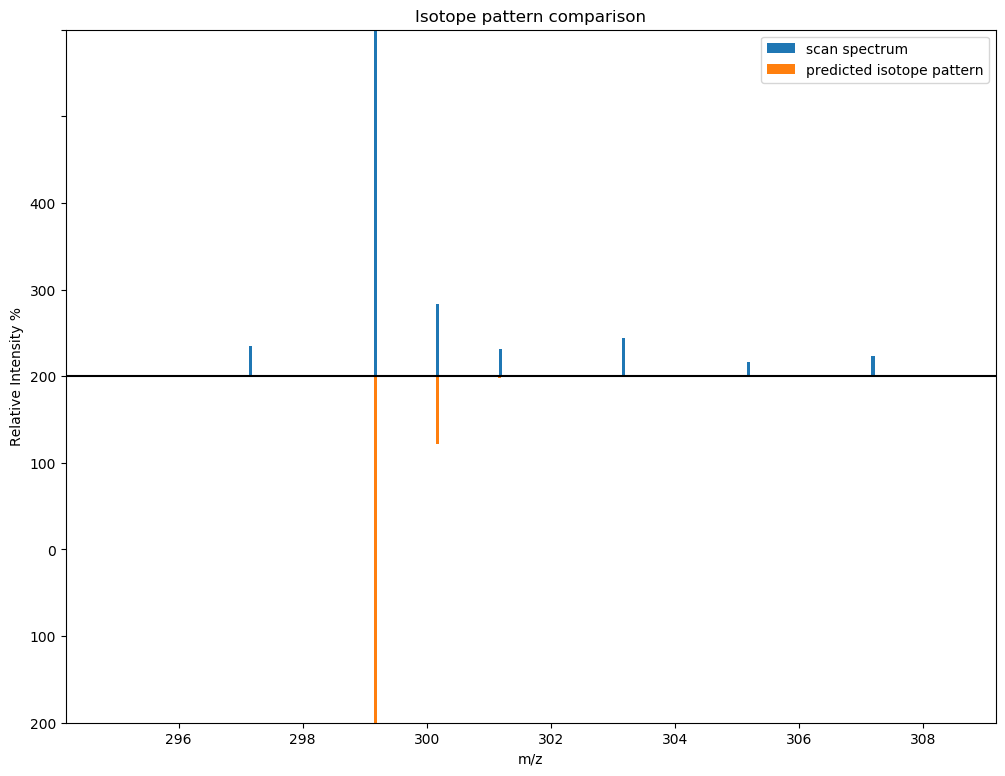

In [22]:
# Isotopic pattern comparison
mvis.iso_plot(scans,299.1765,5,'C18H23N2O2')

# MS2 spectra search and annotation

In [23]:
path = '../../example_mzml/example_ms2.mzML'
scan_frag = msm.get_scans(path, ms_all=True)

Now showing index 1 of 66 total found scans
Precursor: 301.2122 precursor intensity: 119169.9
Scan time: 14.8 minute


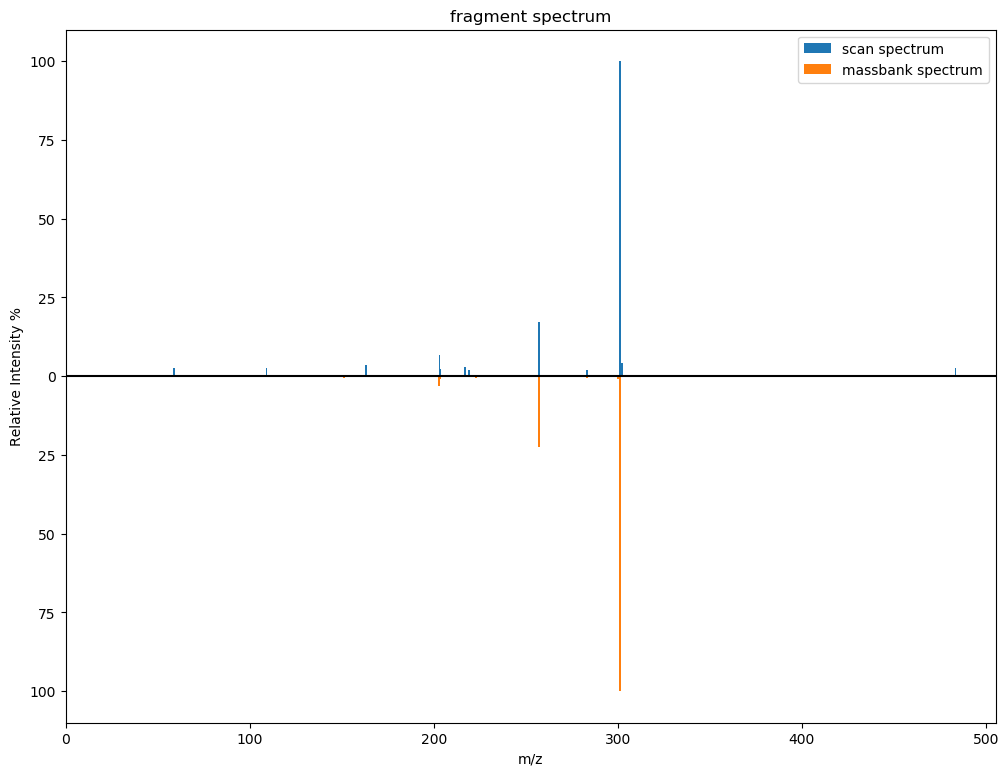

In [24]:
frag.frag_comp(scan_frag, 300, error=5000, scan_index=1, source='MoNA')

In [25]:
# MS2 search
frag.frag_massbank(scan_frag,precursor = 301.2122,error=50)

Now showing index 0 of 30 total found scans
